# Playground september - Kaggle

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading CSV for test and train

In [64]:
train_df = pd.read_csv(r'C:\Users\gabri\OneDrive\Documents\Programming\Kaggle\PlaygroundSept\train.csv', index_col=0)

print(train_df.head())

print(train_df.tail())


test_df = pd.read_csv(r'C:\Users\gabri\OneDrive\Documents\Programming\Kaggle\PlaygroundSept\test.csv')

print(test_df.head())

print(test_df.tail())

         f1        f2         f3        f4       f5        f6       f7  \
id                                                                       
0   0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

          f8            f9        f10  ...     f110    f111     f112  \
id                                     ...                             
0   168900.0  3.992400e+14     86.489  ... -12.2280  1.7482  1.90960   
1   119810.0  3.874100e+15   9953.600  ... -56.7580  4.1684  0.34808   
2   360650.0  1.224500e+13  15827.000  ...  -5.7688  1.2042  0.26290   
3   259490.0  7.781400e+13    -36.837  ... -34.8580  2.0694  0.79631   
4    65332.0  1.907200e+15    144.120  ... -13.64

## EDA

In [3]:
print(train_df.describe())

                  f1             f2             f3             f4  \
count  942672.000000  942729.000000  942428.000000  942359.000000   
mean        0.090201       0.345964    4068.744207       0.201214   
std         0.043564       0.146251    6415.829440       0.212510   
min        -0.149910      -0.019044   -9421.700000      -0.082122   
25%         0.070227       0.283050     418.430000       0.035086   
50%         0.090135       0.389100    1279.500000       0.137000   
75%         0.116500       0.458450    4444.400000       0.297100   
max         0.415170       0.518990   39544.000000       1.319900   

                  f5             f6             f7            f8  \
count  942514.000000  942398.000000  942415.000000  9.425460e+05   
mean        0.304869      -0.071458    1620.843815  3.771642e+05   
std         0.145343       2.123777    1276.281403  3.454325e+05   
min        -0.006990     -12.791000    -224.800000 -2.984300e+04   
25%         0.240520      -1.120700   

In [4]:
print(train_df.shape)

(957919, 119)


In [5]:
## printing all missing values per column

print(train_df.isnull().sum())

f1       15247
f2       15190
f3       15491
f4       15560
f5       15405
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 119, dtype: int64


In [6]:
## Printing all dtypes to see if there are any unwanted datatypes

print(train_df.columns.to_series().groupby(train_df.dtypes).groups)

{int64: ['claim'], float64: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', ...]}


In [7]:
## Printing all labels to see disparity

print(train_df.iloc[:,-1].value_counts())

0    480404
1    477515
Name: claim, dtype: int64


## Data Visualization

In [8]:
## Understading data correlation of features to the labels

corr = train_df[train_df.columns[0:-1]].apply(lambda x: x.corr(train_df['claim']))
print(corr)

print(corr.index)

f1     -0.007896
f2     -0.008261
f3      0.012016
f4      0.004298
f5     -0.004128
          ...   
f114    0.003163
f115   -0.000431
f116   -0.002366
f117   -0.002029
f118    0.004647
Length: 118, dtype: float64
Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
       'f118'],
      dtype='object', length=118)


## Feature Engineering

In [43]:
train_df['nan'] = train_df.isnull().sum(axis=1)
train_df['std'] = train_df.std(axis=1)
train_df['var'] = train_df.var(axis=1)

print(train_df.head())

         f1        f2         f3        f4       f5        f6       f7  \
id                                                                       
0   0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

          f8            f9        f10  ...      f113      f114    f115  \
id                                     ...                               
0   168900.0  3.992400e+14     86.489  ...  -7.11570   4378.80  1.2096   
1   119810.0  3.874100e+15   9953.600  ...   4.14200    913.23  1.2464   
2   360650.0  1.224500e+13  15827.000  ...   8.13120  45119.00  1.1764   
3   259490.0  7.781400e+13    -36.837  ... -16.33600   4952.40  1.1784   
4    65332.0  1.907200e+15    144.120

In [44]:
print(train_df.corr())

             f1        f2        f3        f4        f5        f6        f7  \
f1     1.000000 -0.002268 -0.000750 -0.000821 -0.003765  0.009284  0.000602   
f2    -0.002268  1.000000  0.000205 -0.000595  0.003113 -0.002334 -0.000781   
f3    -0.000750  0.000205  1.000000  0.010628  0.006783 -0.002901  0.003875   
f4    -0.000821 -0.000595  0.010628  1.000000  0.003231  0.003064  0.008180   
f5    -0.003765  0.003113  0.006783  0.003231  1.000000 -0.000248  0.001225   
...         ...       ...       ...       ...       ...       ...       ...   
f118   0.005853  0.001248  0.003134  0.007023  0.002557  0.003214  0.003918   
claim -0.007896 -0.008261  0.012016  0.004298 -0.004128  0.010200  0.008270   
nan   -0.005450 -0.003743  0.006267  0.002379 -0.002289  0.005759  0.003886   
std    0.000288 -0.000518 -0.005177 -0.000671 -0.001630  0.001700 -0.002964   
var   -0.000053 -0.001001 -0.004803 -0.000197 -0.002064  0.002308 -0.001994   

             f8        f9       f10  ...      f113 

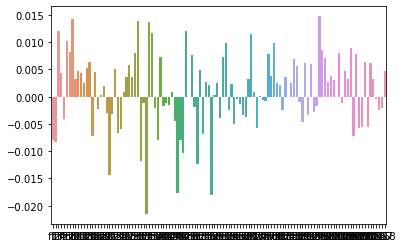

In [45]:
import seaborn as sns

sns.barplot(x=corr.index, y=corr.tolist())
plt.show()

## Starting ML

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [47]:
### Separating labels and features


X = train_df.drop('claim', axis=1)

y = train_df.iloc[:,-4]

print('These are the Train features:','\n', X.head())



print('This is the Train labels:','\n', y.head())

These are the Train features: 
          f1        f2         f3        f4       f5        f6       f7  \
id                                                                       
0   0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

          f8            f9        f10  ...     f112      f113      f114  \
id                                     ...                                
0   168900.0  3.992400e+14     86.489  ...  1.90960  -7.11570   4378.80   
1   119810.0  3.874100e+15   9953.600  ...  0.34808   4.14200    913.23   
2   360650.0  1.224500e+13  15827.000  ...  0.26290   8.13120  45119.00   
3   259490.0  7.781400e+13    -36.837  ...  0.79631 -16.33600   4952.40   

In [48]:
### Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating data pipeline

steps = [('inputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', xgb.XGBClassifier(n_estimators=100, booster='gbtree', seed=123,  
                                      use_label_encoder =False, objective="binary:logistic",))]

xgb_pipeline = Pipeline(steps, verbose=True)

xgb_pipeline.fit(X_train, y_train)



[Pipeline] ........... (step 1 of 3) Processing inputer, total=   1.8s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   1.5s
[23:26:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............. (step 3 of 3) Processing model, total= 3.3min


Pipeline(steps=[('inputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=123, subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               ver

In [49]:
preds_xgb = xgb_pipeline.predict(X_test)

print ('ROC AUC Score for xgboost',roc_auc_score(y_test,preds_xgb))

ROC AUC Score for xgboost 0.7716923124182801


In [15]:
### cross_val_scores = cross_val_score(xgb_pipeline, X , y, cv=3, scoring="roc_auc")

### print("10-fold RMSE: ", np.mean(cross_val_scores))

## Trying a logistic Regression

In [50]:
steps2 = [('inputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('pca', PCA()),
         ('model', LogisticRegression())]


logreg_pipeline = Pipeline(steps2)

logreg_pipeline.fit(X_train, y_train)



Pipeline(steps=[('inputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA()), ('model', LogisticRegression())])

In [51]:
preds_logreg = logreg_pipeline.predict(X_test)

print ('ROC AUC Score for logreg',roc_auc_score(y_test,preds_logreg))

ROC AUC Score for logreg 0.738204365233444


# Trying a inputer using the median

In [52]:
### Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating data pipeline

steps = [('inputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler()),
        ('model', xgb.XGBClassifier(n_estimators=100, booster='gbtree', seed=123,  
                                      use_label_encoder =False, objective="binary:logistic",))]

xgb_pipeline_median = Pipeline(steps, verbose=True)

xgb_pipeline_median.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 3) Processing inputer, total=  15.5s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   1.6s
[23:33:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............. (step 3 of 3) Processing model, total= 3.3min


Pipeline(steps=[('inputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=123, subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
 

In [53]:
preds_xgb_median = xgb_pipeline_median.predict(X_test)

print ('ROC AUC Score for logreg',roc_auc_score(y_test,preds_xgb_median))

ROC AUC Score for logreg 0.771587600419851


## trying robust

In [54]:
### Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating data pipeline

steps = [('inputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', RobustScaler()),
        ('model', xgb.XGBClassifier(n_estimators=100, booster='gbtree', seed=123,  
                                      use_label_encoder =False, objective="binary:logistic",))]

xgb_pipeline_median_robust = Pipeline(steps, verbose=True)

xgb_pipeline_median_robust.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 3) Processing inputer, total=  15.6s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   2.4s
[23:40:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............. (step 3 of 3) Processing model, total= 3.5min


Pipeline(steps=[('inputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=123, subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
   

In [55]:
preds_xgb_median_robust= xgb_pipeline_median_robust.predict(X_test)

print ('ROC AUC Score for logreg',roc_auc_score(y_test,preds_xgb_median_robust))

ROC AUC Score for logreg 0.7715841029869667


## using best model to predict test df

In [66]:
test_df['nan'] = test_df.isnull().sum(axis=1)
test_df['std'] = test_df.std(axis=1)
test_df['var'] = test_df.var(axis=1)

ids = test_df.pop('id')

print(test_df.head())



         f1        f2        f3       f4       f5       f6       f7        f8  \
0  0.165850  0.487050   1295.00  0.02310  0.31900  0.90188   573.29    3743.7   
1  0.129650  0.373480   1763.00  0.72884  0.33247 -1.26310   875.55  554370.0   
2  0.120190  0.445210    736.26  0.04615  0.29605  0.31665  2659.50  317140.0   
3  0.054008  0.395960    996.14  0.85934  0.36678 -0.17060   386.56  325680.0   
4  0.079947 -0.006919  10574.00  0.34845  0.45008 -1.84200  3027.00  428150.0   

             f9       f10  ...      f112     f113     f114    f115  \
0  2.705700e+12  6221.000  ...  0.430880 -10.7410  81606.0  1.1940   
1  5.955700e+14   934.430  ... -1.071200  11.8320  90114.0  1.1507   
2  3.977800e+14   131.810  ... -1.931200  -3.2804  37739.0  1.1548   
3 -3.432200e+13   -26.473  ... -0.011633   1.3840  26849.0  1.1490   
4  9.291500e+11  5999.400  ...  0.757080  -4.9405  50336.0  1.2488   

           f116    f117     f118  nan           std           var  
0  1.980400e+14  2017.1 

In [67]:
final_pred = xgb_pipeline.predict(test_df)

output = pd.DataFrame({'id': ids,
                       'claim': final_pred.squeeze()})

output.head()

,id,claim
0,957919,1
1,957920,0
2,957921,1
3,957922,0
4,957923,0


In [68]:
output_filename = "test_prediction_output.csv"
output.to_csv(output_filename, index=False)